# Исследование надёжности заёмщиков 

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных


<ul>Структура:
    <li>airports_nearest — расстояние до ближайшего аэропорта в метрах (м),</li>
    <li>balcony — число балконов,</li>
    <li>ceiling_height — высота потолков (м),</li>
    <li>cityCenters_nearest — расстояние до центра города (м),</li>
    <li>days_exposition — сколько дней было размещено объявление (от публикации до снятия),</li>
    <li>first_day_exposition — дата публикации</li>
    <li>floor — этаж,</li>
    <li>floors_total — всего этажей в доме,</li>
    <li>is_apartment — апартаменты (булев тип),</li>
    <li>kitchen_area — площадь кухни в квадратных метрах (м²)</li>
    <li>last_price — цена на момент снятия с публикации,</li>
    <li>living_area — жилая площадь в квадратных метрах (м²),</li>
    <li>locality_name — название населённого пункта,</li>
    <li>open_plan — свободная планировка (булев тип),</li>
    <li>parks_around3000 — число парков в радиусе 3 км,</li>
    <li>parks_nearest — расстояние до ближайшего парка (м),</li>
    <li>ponds_around3000 — число водоёмов в радиусе 3 км,</li>
    <li>ponds_nearest — расстояние до ближайшего водоёма (м),</li>
    <li>rooms — число комнат,</li>
    <li>studio — квартира-студия (булев тип),</li>
    <li>total_area — общая площадь квартиры в квадратных метрах (м²),</li>
    <li>total_images — число фотографий квартиры в объявлении.</li>
</ul>

### Откройте файл с данными и изучите общую информацию. 

1.1 Импортировали библиотеку pandas. Считали данные из csv-файла в датафрейм и сохранили в переменную data. Вывели первые 20 строчек датафрейма на экран. 

In [1]:
import pandas as pd 
data=pd.read_csv('real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


1.2. Вывели основную информацию о датафрейме.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1.3. Посторили гисограмму для всех значений датафрейма.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

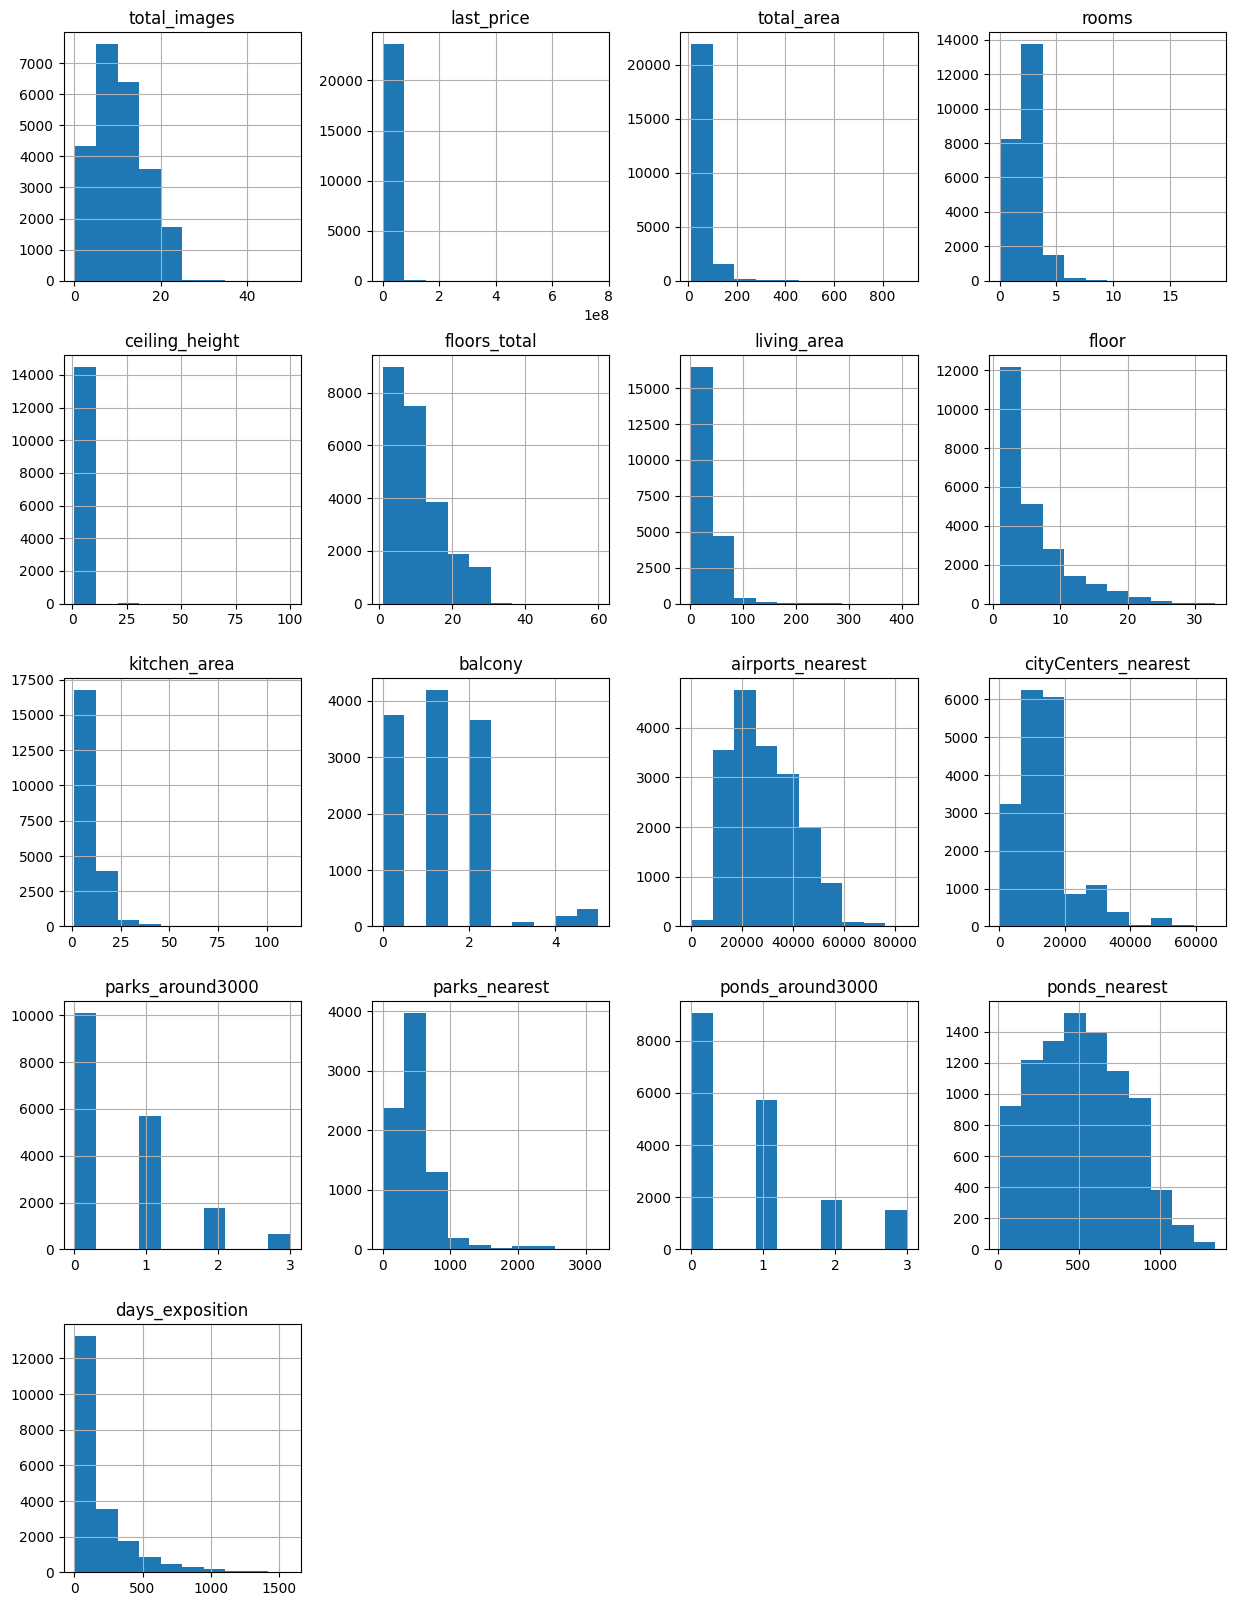

In [3]:
data.hist(figsize=(15, 20))

### Предобработка данных

#### Устранение пропусков

2.1. Вывели количество пропущенных значений по каждому столбцу. 

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

2.2. Заполнили пропуски в столбце 'balcony'. Заполняем нулями, так как 'Nan' обозначет отсутвие балкона. 

In [5]:
data['balcony']=data['balcony'].fillna(0)

2.3. Проверили остались ли пропуски в столбце 'balcony'.

In [6]:
data['balcony'].isna().sum()

0

2.4.Нашли отношение медианнго значения жилой площади к медианному значаению общей площади.  Заполнили пропуски в столбце 'living_area' найденным отношением умноженным на общую площадь.

In [7]:
#for d in data['rooms']:
 #   data.loc[(data['living_area'].isna())&(data['rooms']==d),'living_area']=\
  #  data.loc[data['rooms']==d,'living_area'].median()
ratio_l=data['living_area'].median()/data['total_area'].median()
data['living_area']=data['living_area'].fillna(data['total_area']*ratio_l)

2.5. Проверили остались ли пропуски в столбце 'living_area'.

In [8]:
data['living_area'].isna().sum()

0

2.6 По аналогии с пропусками в "living_area", заполнили пропуски в "kitchen_area"

In [9]:
ratio_k=data['kitchen_area'].median()/data['total_area'].median()
data['kitchen_area']=data['kitchen_area'].fillna(data['total_area']*ratio_k)

2.7. Проверили остались ли пропуски в столбце 'kitchen_area'.

In [10]:
data['kitchen_area'].isna().sum()

0

##### Вывод:
По характеру данных были устранены возможные пропуски, но не все. В столбцах 'living_area', 'kitchen_area' заполнили пропуски отношением площади(жилой, кухни) к общей площади. В столбце'locality_name' невозможно убрать пропуски, потому что узнать насселный пункт не получится.  В столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' однозначно определить расстояние нельзя. В столбце 'days_exposition' невозможно определить характер пропущенных значений.

#### Изменение типов данных

2.6. Заменили тип 'object' на 'bool' в столбце 'is_apartment'. Так как значения в столбце 'True', 'False'- это булевый тип. Значения 'NaN'заменили на 'False'.

In [11]:
def change(row):
    if row!=True:
       return False
    else:
       return True
data['is_apartment']=data['is_apartment'].apply(change)

2.7. Преобразовали к типу 'datetime64' столбец 'first_day_exposition'.Так как ранее дата и время были 'object'.

In [12]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


2.8.Для экономии памяти изменим 'float64'на 'float32'. Преобразуем к типу 'int' столбец 'balcony'.

In [13]:
data['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [14]:
data['total_area']=data['total_area'].astype('float32')
data['ceiling_height']=data['ceiling_height'].astype('float32')
data['floors_total']=data['floors_total'].astype('float32')
data['living_area']=data['living_area'].astype('float32')
data['kitchen_area']=data['kitchen_area'].astype('float32')
data['balcony']=data['balcony'].astype('int')


2.9. Проверили изменение типов.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float32       
 6   floors_total          23613 non-null  float32       
 7   living_area           23699 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float32       
 13  balcony         

##### Вывод:
Изменены типы данных, где по значениям однозначно можно было определить верный тип данных.

#### Устранение дубликатов

2.9. Вывели уникальные названия населённого пункта.

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

2.10. Заменили все буквы "ё" на "е" для устранения дубликатов. 

In [17]:
data['locality_name']=data['locality_name'].replace({'ё':'е'}, regex=True)

2.11. Проверили устранения неявных дубликатов.

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

2.12. Проверили нет ли явно повторяющихся строк.

In [19]:
data.duplicated().sum()

0

##### Вывод:
Проверили и устранили дубликаты. В столбце 'locality_name' изменили букву "ё" на "е".

#### Устранение анамальных значений.

2.13. Вывели уникальные значения высоты потолков.

In [20]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

2.14. В столбце 'ceiling_height' высота потолков есть 27., 24. Логично предположить, что на самом деле это вещественные значения. Так же среднее высота потолков варьируется в диапозоне 2.3-3 метра, поэтому удалили строчки, не входящие в этот диапозон, так как это аномальные значения. Заполнили пропуски медианным значением высоты потокла.

In [21]:
data.loc[data['ceiling_height']>6, 'ceiling_height']=data['ceiling_height']/10
data = data.drop(data[data['ceiling_height'] > 3].index)
data = data.drop(data[data['ceiling_height']<= 2.4].index)
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

2.15. Проверили устранение аномальных значений.

In [22]:
data['ceiling_height'].unique()

array([2.7 , 2.6 , 2.5 , 2.67, 2.56, 2.75, 2.9 , 2.8 , 2.55, 3.  , 2.65,
       2.61, 2.77, 2.85, 2.64, 2.57, 2.71, 2.47, 2.73, 2.84, 2.72, 2.54,
       2.51, 2.78, 2.76, 2.58, 2.52, 2.87, 2.66, 2.59, 2.45, 2.92, 2.53,
       2.74, 2.96, 2.46, 2.79, 2.95, 2.94, 2.83, 2.48, 2.62, 2.82, 2.63,
       2.88, 2.81, 2.97, 2.68, 2.93, 2.98, 2.86, 2.69, 2.99, 2.91, 2.89,
       2.49], dtype=float32)

2.16. В столбце 'living_area'-жилая площадь в квадратных метрах есть аномальные значения меньше 4. Удалили эти строки. 

In [23]:
data = data.drop(data[data['living_area']<4].index)


2.17. В столбце 'kitchen_area'-площадь кухни в квадратных метрах есть аномальные значения больше 50. Удалили эти строки.

In [24]:
data = data.drop(data[data['kitchen_area']<4].index)

Удалили все строки с временем размещения объявления больше 1000 дней.

In [27]:
data = data.drop(data[data['days_exposition'] >1300].index)

In [28]:
data=data.drop(data[data['total_area']>470].index)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21997 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21997 non-null  int64         
 1   last_price            21997 non-null  float64       
 2   total_area            21997 non-null  float32       
 3   first_day_exposition  21997 non-null  datetime64[ns]
 4   rooms                 21997 non-null  int64         
 5   ceiling_height        21997 non-null  float32       
 6   floors_total          21912 non-null  float32       
 7   living_area           21997 non-null  float32       
 8   floor                 21997 non-null  int64         
 9   is_apartment          21997 non-null  bool          
 10  studio                21997 non-null  bool          
 11  open_plan             21997 non-null  bool          
 12  kitchen_area          21997 non-null  float32       
 13  balcony         

##### Вывод:
Проверили анализ аномальных значений. Удалили те строки, которые выбиваются среди остальных значений. Так как при дальнейшем анализе они могли дать неточную картину, большой разборс данных.
После предобработки данных исходный датафрейм уменьшился на 7%. 

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление новых столбцов

 <p>3. Добавили новые столбцы со следющими c парметрами</p>
<ul>
    <li>цена одного квадратного метра;</li>
    <li>день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);</li>
    <li>месяц публикации объявления;</li>
    <li>год публикации объявления;</li>
    <li>тип этажа квартиры (значения — «‎первый», «последний», «другой»);</li>
    <li>расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).</li>
</ul>

In [30]:
data['price_one_m']=data['last_price']/data['total_area']
data['weekday_exposition']=data['first_day_exposition'].dt.weekday
data['month_exposition']=data['first_day_exposition'].dt.month
data['year_exposition']=data['first_day_exposition'].dt.year
def categorize_floor(row):
    total_floor=row['floors_total']
    floor=row['floor']
    try :
        if floor==1:
            return 'первый'
        elif floor==total_floor:
            return 'последний'
        else:
            return 'другой'
    except :
        return "не указано"          
data['type_floor']=data.loc[:,['floor','floors_total']].apply(categorize_floor, axis=1) 
data['kmCentres_nearest']=(data['cityCenters_nearest']/1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,weekday_exposition,month_exposition,year_exposition,type_floor,kmCentres_nearest
0,20,13000000.0,108.000000,2019-03-07,3,2.7,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.400002,2018-12-04,1,2.6,11.0,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.788947,1,12,2018,первый,19.0
2,10,5196000.0,56.000000,2015-08-20,2,2.6,5.0,34.299999,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.000000,2015-07-24,3,2.6,14.0,91.730766,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
5,10,2890000.0,30.400000,2018-09-10,1,2.6,12.0,14.400000,5,False,...,NaN,NaN,NaN,55.0,95065.790667,0,9,2018,другой,NaN


##### Вывод:
Добавили новые столбцы по указанным параметрам.

### Проведите исследовательский анализ данных

4.1. Построили гистограмму для общаей площади.

<AxesSubplot:>

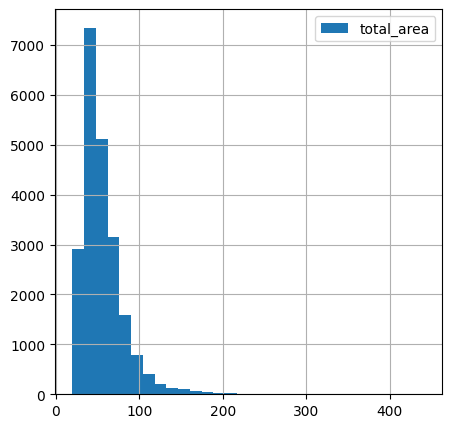

In [31]:
data['total_area'].hist(bins=30, figsize=(5, 5), legend='total_area')

Больше всего объявлений с площадью примерно 50 кв. метров. Квартир с площадью больше 100 меньше. Следовательно чаще всего запросов на жилье с площадью 40-70 кв.метров.

4.2. Построили гистограмму для жилой площади.

<AxesSubplot:>

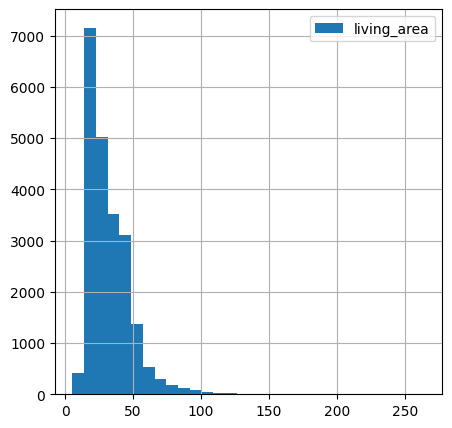

In [32]:
data['living_area'].hist(bins=30, figsize=(5, 5), legend='living_area')

До 50 кв.м жилой площади занимает большую часть всех предложений. Заметим, что значения больше 75 кв.м встречаются намного реже. 

4.3. Построили гистограмму для площадь кухни.

<AxesSubplot:>

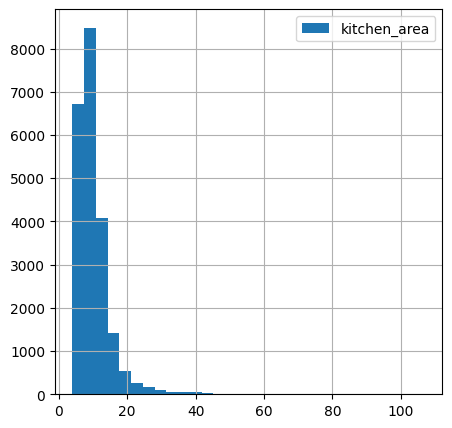

In [33]:
data['kitchen_area'].hist(bins=30, figsize=(5, 5), legend='kitchen_area')

Площадь 6-15 кв.м встречается больше всего. Значения 25-42 кв.м в на гисторамме занимают меньшую долю. 

4.4. Построили гистограмму для цены объекта.

In [34]:
data['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

<AxesSubplot:>

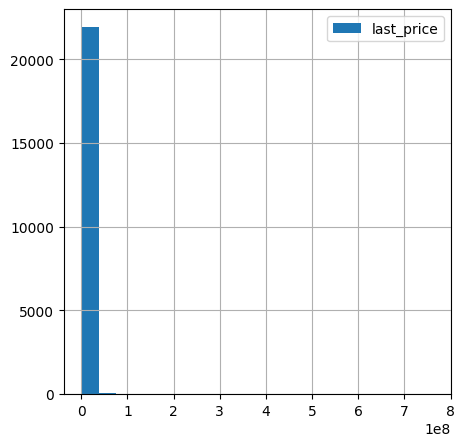

In [35]:
data['last_price'].hist(bins=20, figsize=(5, 5), legend='last_price')

<AxesSubplot:>

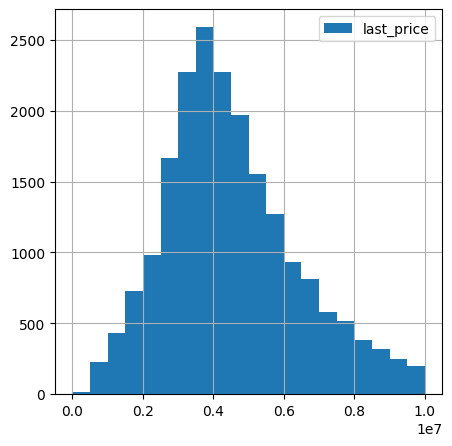

In [36]:
dt_p=data.loc[data['last_price']<10000000]
dt_p['last_price'].hist(bins=20, figsize=(5, 5), legend='last_price')

Больше всего предложений со стоимотью от 3-6 млн. рублей. 

4.5. Построили гистограмму для количества комнат.

<AxesSubplot:>

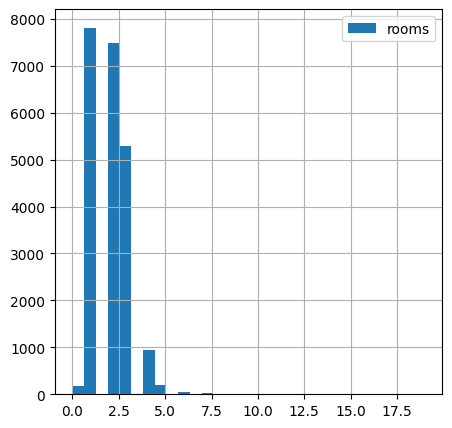

In [37]:
data['rooms'].hist(bins=30, figsize=(5, 5), legend='rooms')

<AxesSubplot:>

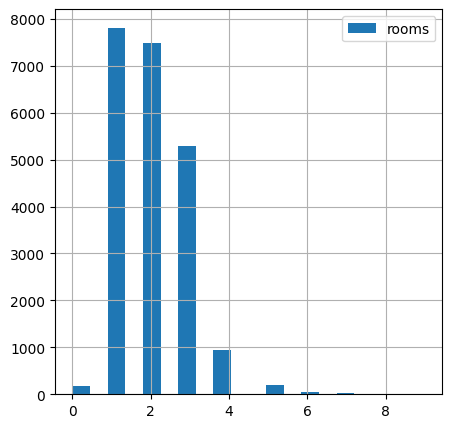

In [38]:
dt_r=data.loc[data['rooms']<10]
dt_r['rooms'].hist(bins=20, figsize=(5, 5), legend='rooms')

Больше всего квартир с 1-3 комнатами. 

4.6. Построили гистограмму для высоты потолков.

<AxesSubplot:>

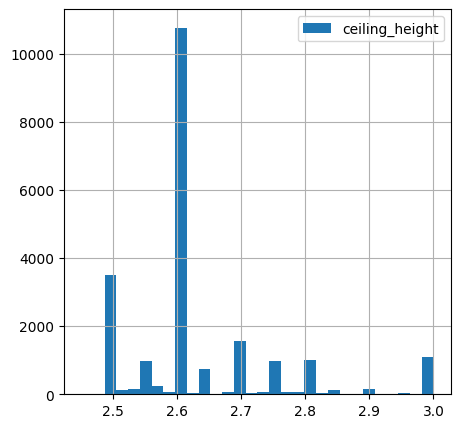

In [39]:
data['ceiling_height'].hist(bins=30, figsize=(5, 5), legend='ceiling_height')

Из гисторгаммы видно высота потолков варьируется в пределах 2.46-3 метра. Значение примерно 2.6 встречется больше всего.

4.7. Построили гистограмму для этажа квартиры.

<AxesSubplot:>

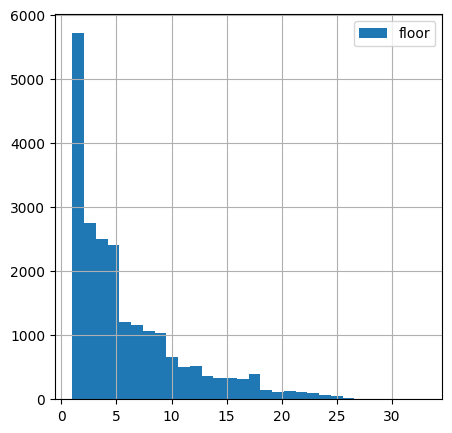

In [40]:
data['floor'].hist(bins=30, figsize=(5, 5), legend='floor')

Больше всего квартир на 1- 5 этаж.

4.8. Построили гистограмму для типа этажа квартиры.

<AxesSubplot:>

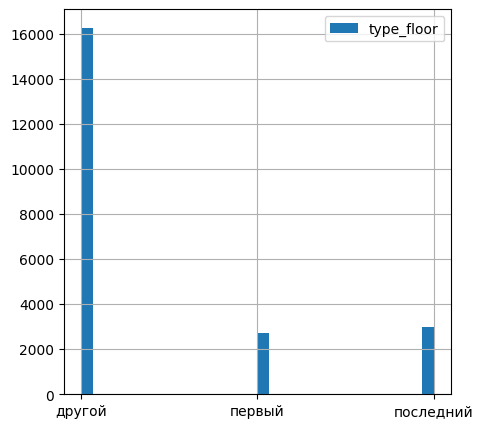

In [41]:
data['type_floor'].hist(bins=30, figsize=(5, 5), legend='type_floor')

Меньше всего квартир на первом и последнем этажах.

4.9. Построили гистограмму для этажей в доме.

<AxesSubplot:>

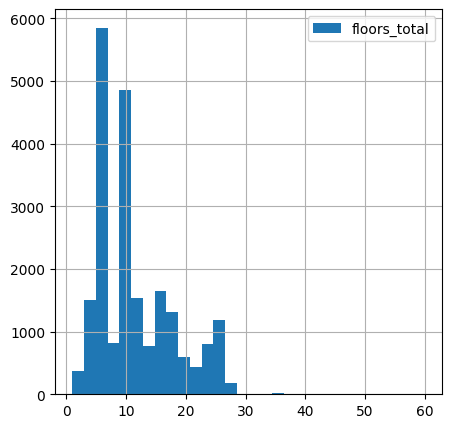

In [42]:
data['floors_total'].hist(bins=30, figsize=(5, 5), legend='floors_total')

Больше всего 4-5, 9-10 этажных домов.

4.10. Построили гистограмму для расстояния до центра города.

<AxesSubplot:>

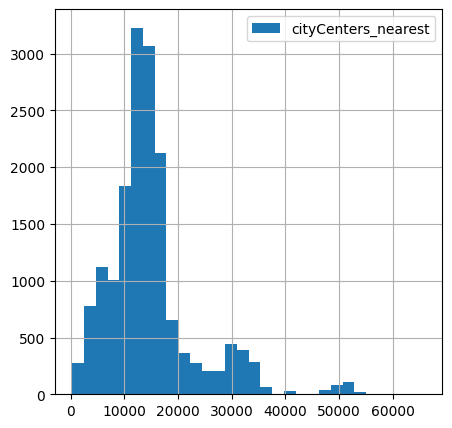

In [43]:
data['cityCenters_nearest'].hist(bins=30, figsize=(5, 5), legend='cityCenters_nearest')

В среднем расстояние до центра не больше 20 км.

4.11. Построили гистограмму для расстояния до ближайшего аэропорта.

<AxesSubplot:>

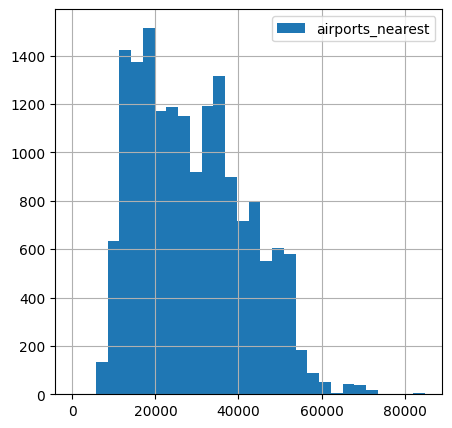

In [44]:
data['airports_nearest'].hist(bins=30, figsize=(5, 5), legend='airports_nearest')

Расстояние до аэрпорта от 16 до 40 км в большинстве объявлений.

4.12. Построили гистограмму для расстояния до ближайшего парка.

<AxesSubplot:>

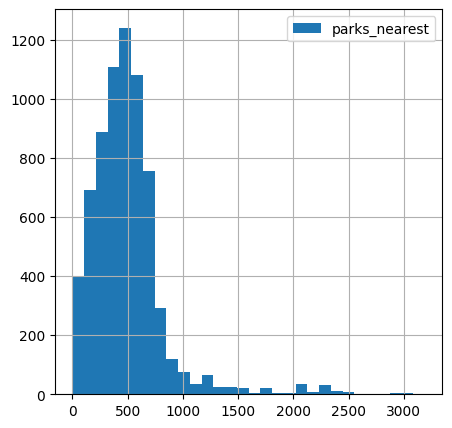

In [45]:
data['parks_nearest'].hist(bins=30, figsize=(5, 5), legend='parks_nearest')

Путь для ближайщего парка занимает до 900 м в среднем.

4.12. Построили гистограмму для дня публикации объявления.

<AxesSubplot:>

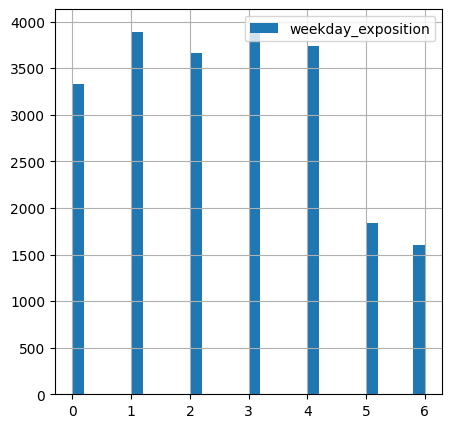

In [46]:
data['weekday_exposition'].hist(bins=30, figsize=(5, 5), legend='weekday_exposition')

Чаще всего объявление публиковали в будние дни.

4.12. Построили гистограмму для месяца публикации объявления.

<AxesSubplot:>

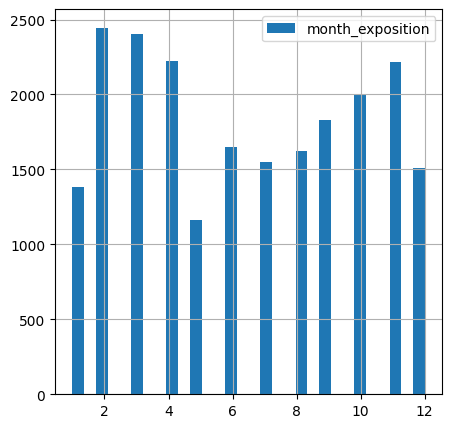

In [47]:
data['month_exposition'].hist(bins=30, figsize=(5, 5), legend='month_exposition')

В феврале, марте, апреле и ноябре больше всего выставлено объявлений.

##### Вывод:
<p>При построение гистограмм по всем параметрам отмечено следующее:</p>
<ul>
     <li>Больше всего объявлений с площадью примерно 50 кв. м.</li>
     <li>Жилая прощадь занимает от 15-30 кв.м</li>
     <li>Кухня занимет 6-12 кв.м</li>
     <li>Больше всего объявлений со стоимостью 3-6 млн. рублей</li>
     <li>Больше всего квартир с 1-3 комнатами.</li>
     <li>Высота потолков варьируется в пределах 2.46-3 метра</li>
     <li>Меньше всего квартир на первом и последнем этажах.</li>
     <li>Больше всего 4-5, 9-10 этажных домов.</li>
     <li>Больше всего квартир на 1- 5 этаж</li>
     <li>Меньше всего квартир на первом и последнем этажах.</li>
     <li>Путь для ближайщего парка занимает до 900 м в среднем.</li>
     <li>В среднем расстояние до центра не больше 20 км.</li>
     <li>Расстояние до аэрпорта от 16 до 40 км в большинстве объявлений.</li>
     <li>Чаще всего объявление публиковали в будние дни.</li>
     <li>В феврале. марте, апреле и ноябре больше всего выставлено объявлений.</li>
</ul>
   

4.13. Построили гистограмму для количества дней размещения объявление. Посчитали среднее и медианное значения.

<AxesSubplot:>

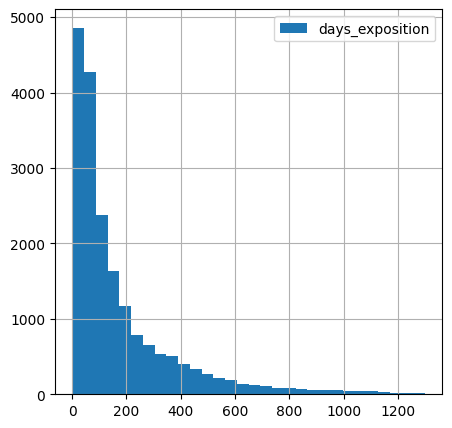

In [48]:
data['days_exposition'].hist(bins=30, figsize=(5, 5), legend='days_exposition')

In [49]:
#print('Среднее значаение продолжительности размещения объявления-', data['days_exposition'].mean().round())
#print('Медианное значаение продолжительности размещения объявления-', data['days_exposition'].median().round())

Рассмотрим отрезок 0-100 дней. 

<AxesSubplot:ylabel='Frequency'>

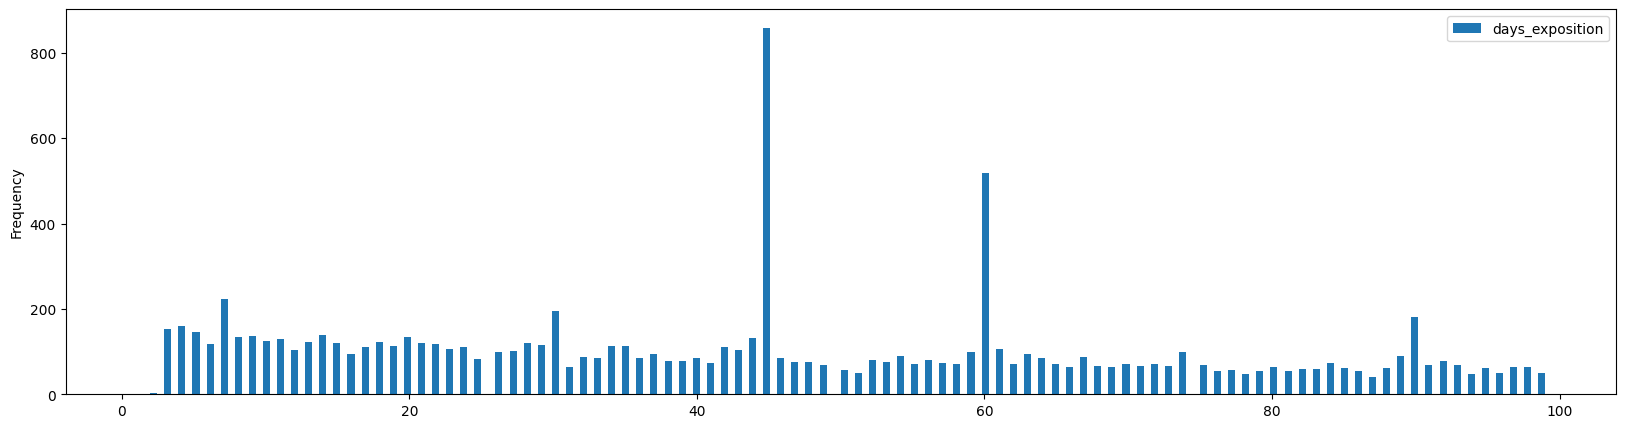

In [50]:
dt=data.loc[data['days_exposition']<100]
dt.plot(y='days_exposition', kind='hist', bins=200, figsize=(20, 5), legend='days_exposition')

Значения 45 и 60 являются выбросами, а не реальными продажи, поэтому удалим их.

In [51]:
data['days_exposition']=data['days_exposition'].round()# округлили, так занчения были 45.0000000001
data=data.loc[data['days_exposition']!=45]
data=data.loc[data['days_exposition']!=60]
print('Среднее значаение продолжительности размещения объявления-', data['days_exposition'].mean().round())
print('Медианное значаение продолжительности размещения объявления-', data['days_exposition'].median().round())

Среднее значаение продолжительности размещения объявления- 183.0
Медианное значаение продолжительности размещения объявления- 104.0


##### Вывод:
Среднее значаение продолжительности размещения объявления равно 183 дня, медианное-104. Быстрыми продажами можно считать до 1,5 месяца, а долгими больше двух лет.

4.14 Установили зависимость между общей площадью и ценой.

<AxesSubplot:xlabel='total_area'>

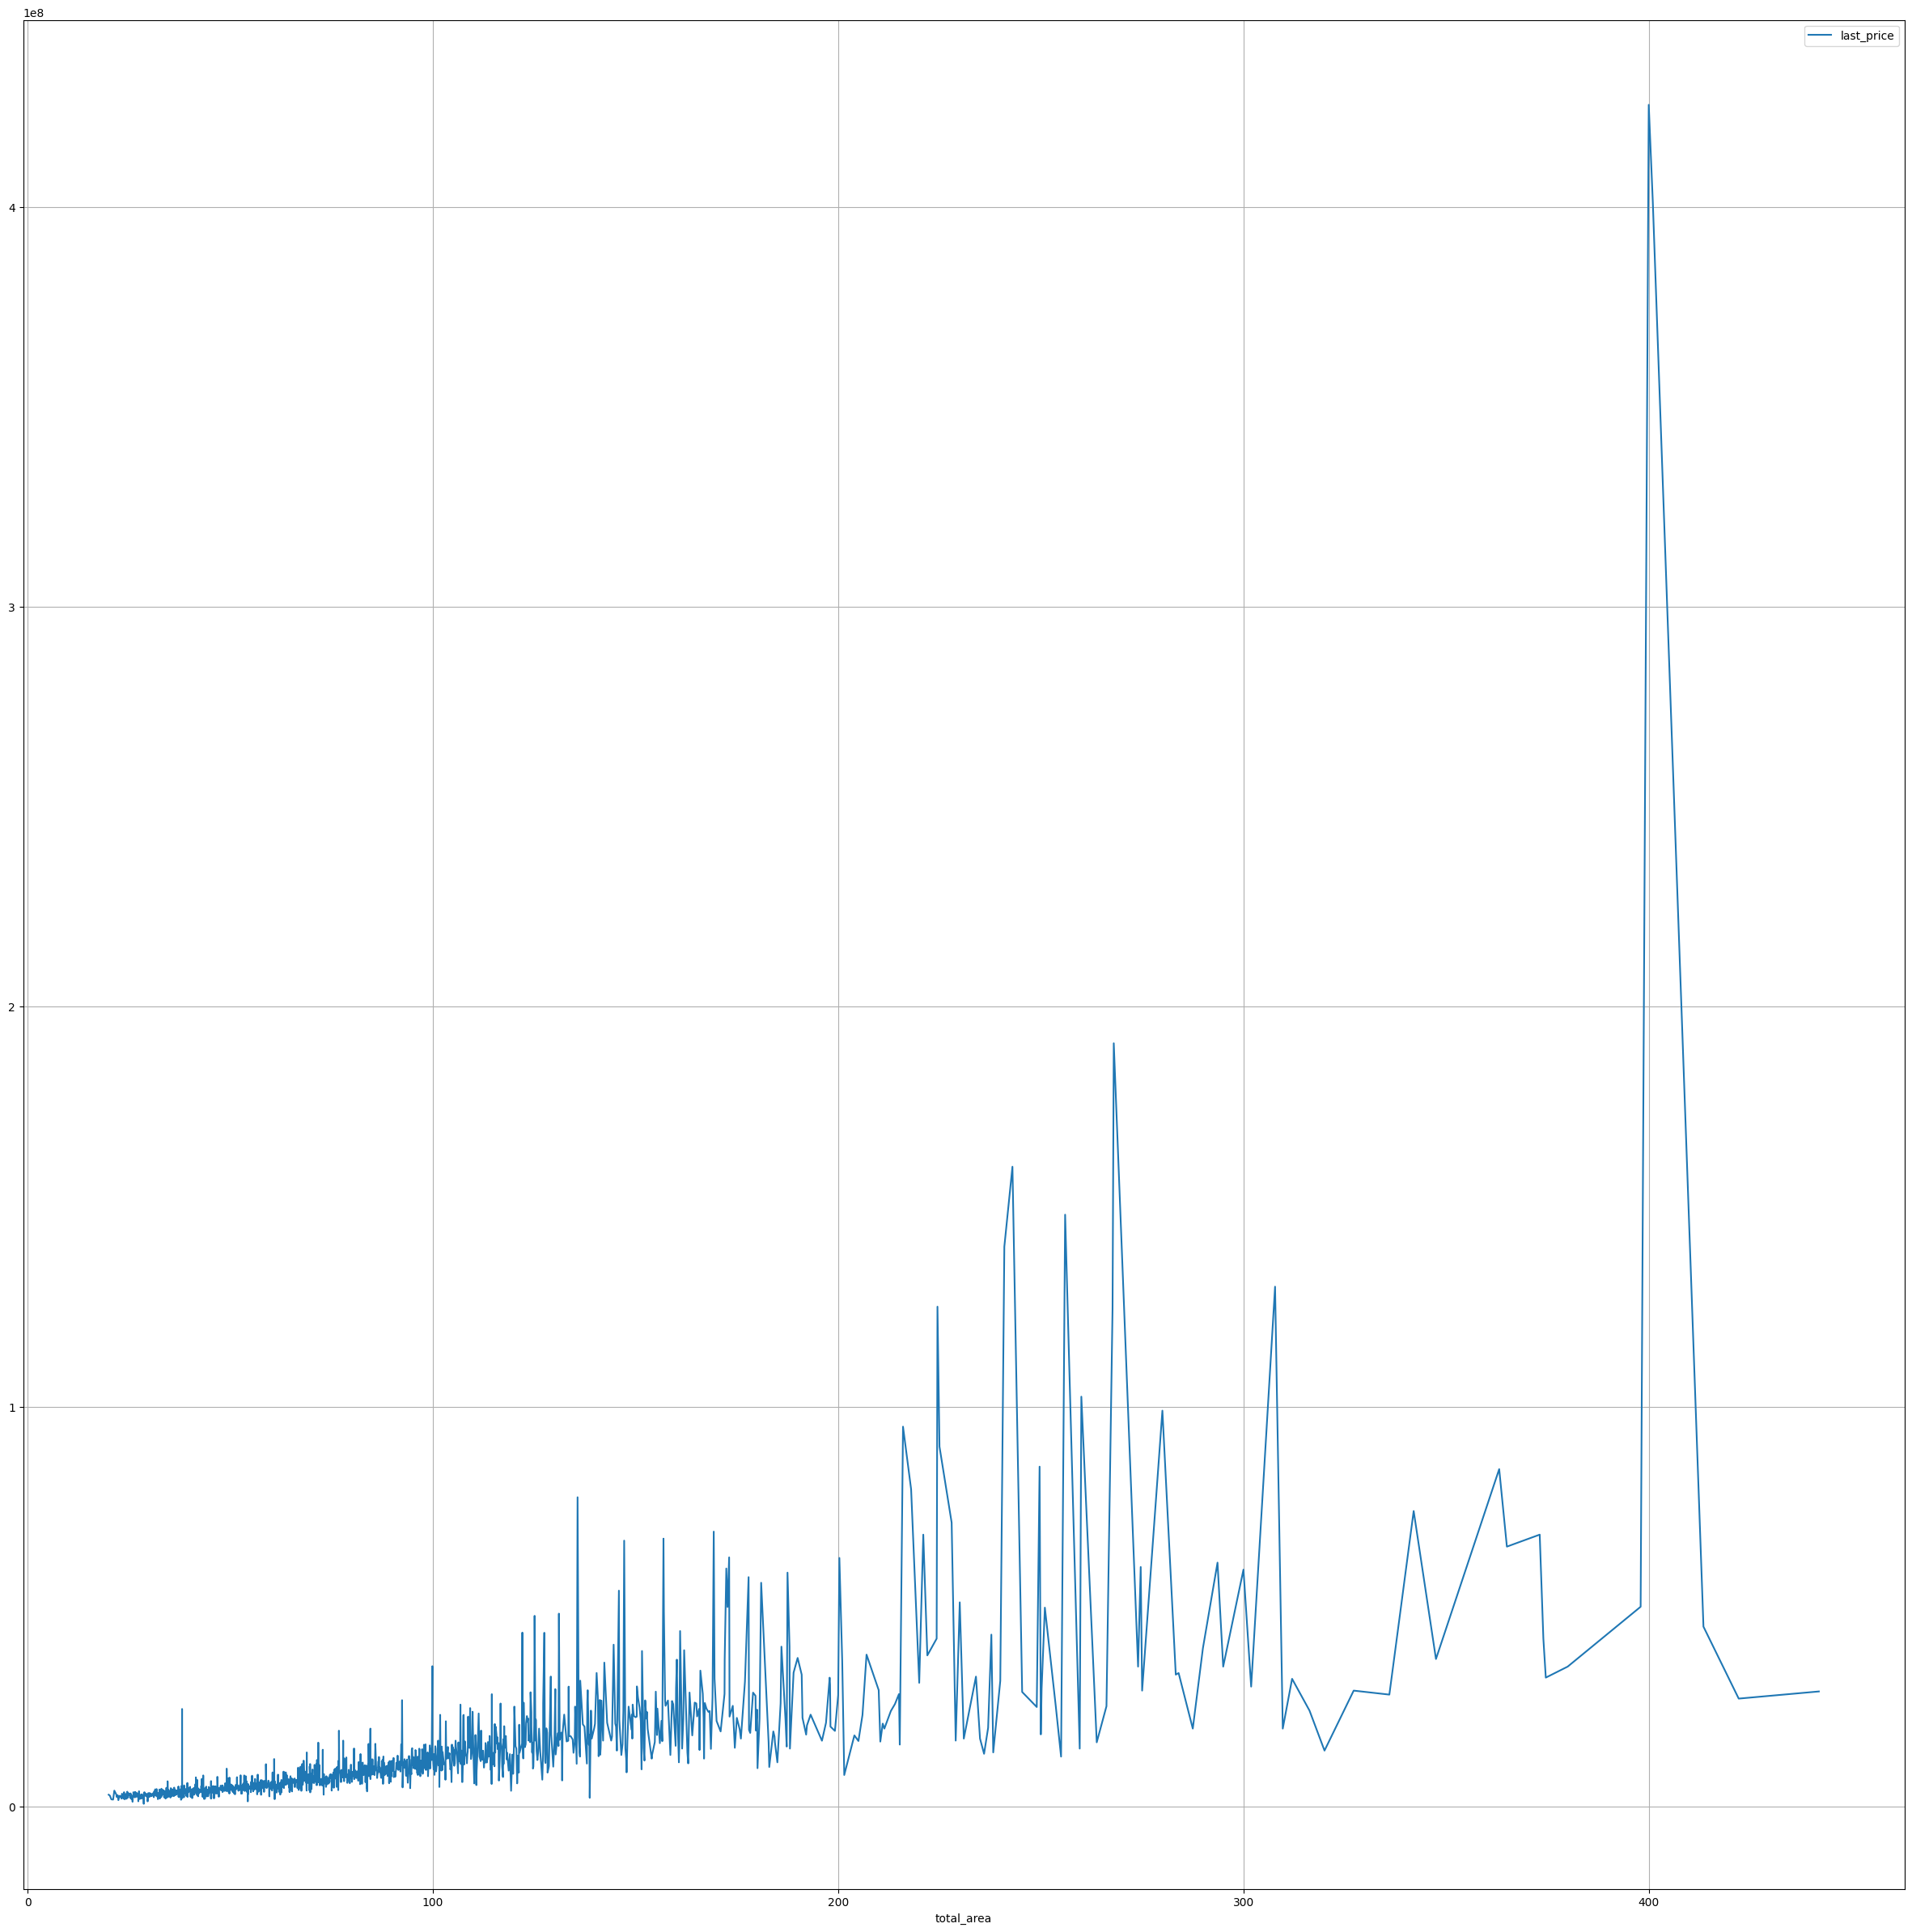

In [53]:
(data.pivot_table(index='total_area', values='last_price', aggfunc='mean')
 .plot(grid=True, figsize=(30,30))
)

По графкy видно, что с увеличением площади стоимость повышается.

4.15 Установили зависимость между жилой площадью и ценой.

<AxesSubplot:xlabel='living_area'>

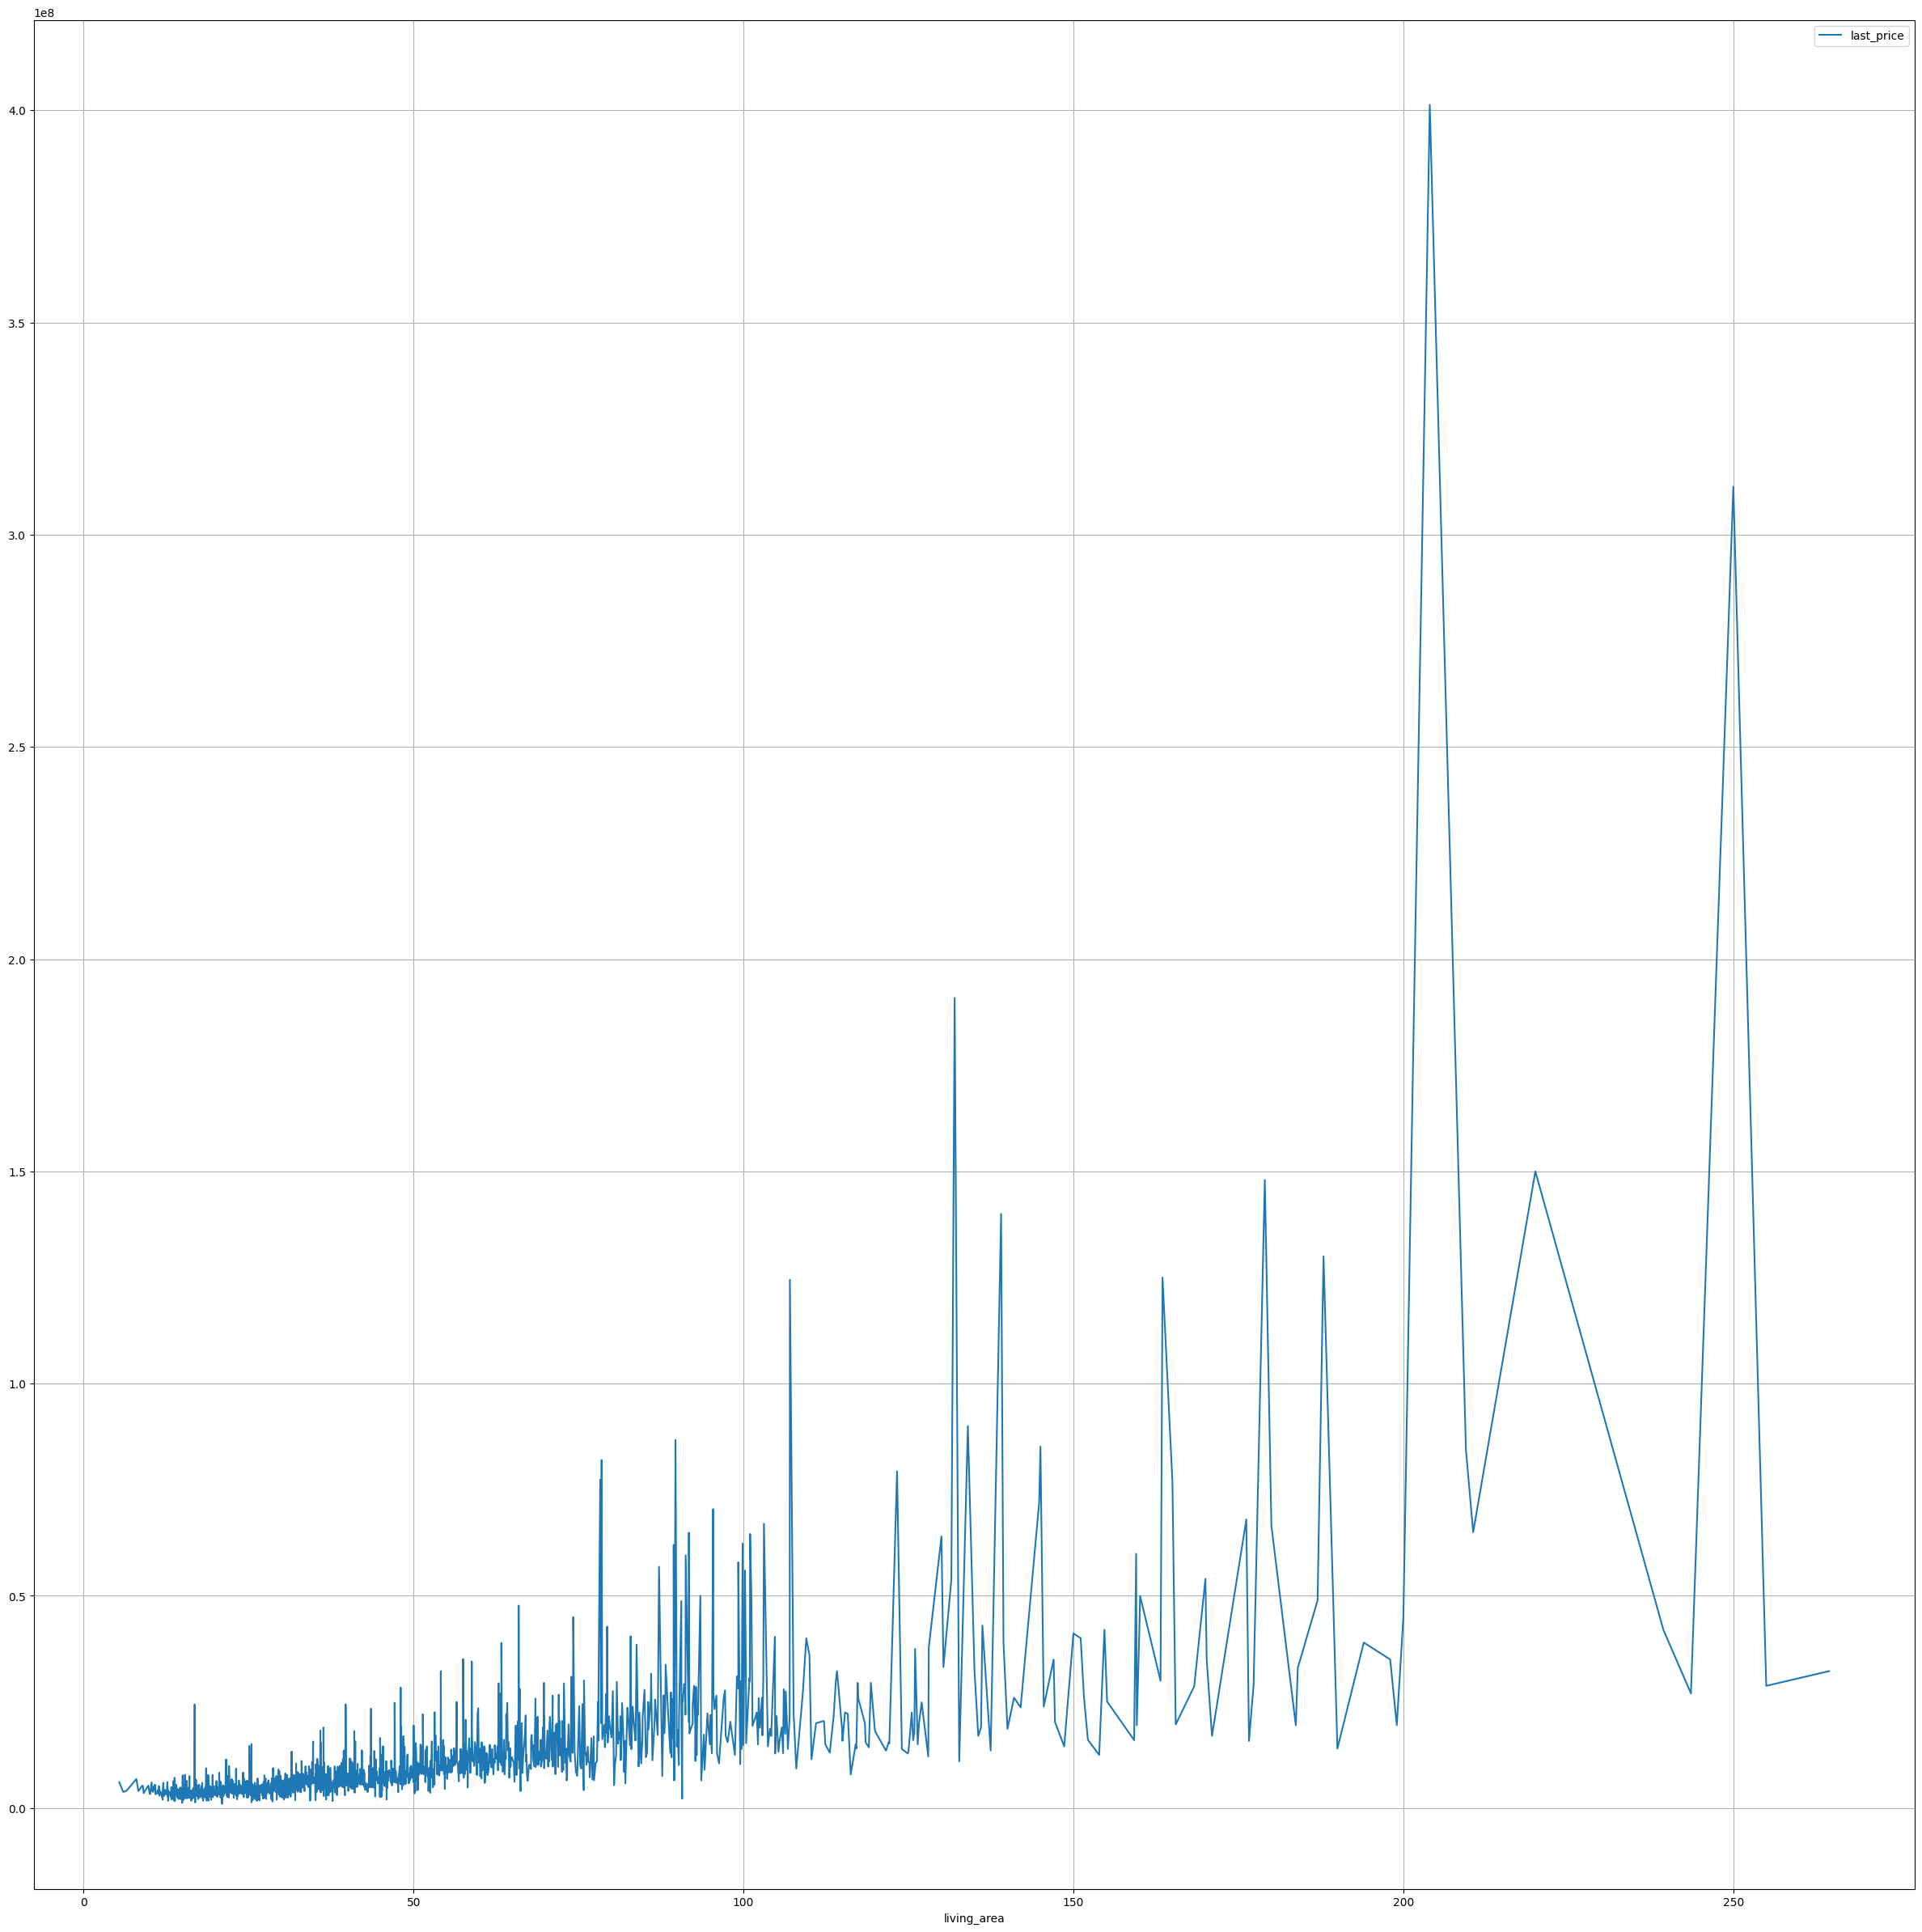

In [54]:
(data.pivot_table(index='living_area', values='last_price', aggfunc='mean')
 .plot(grid=True, figsize=(30,30))
)

По графкy видно, что с увеличением площади стоимость повышается.

4.16 Установили зависимость между площадью кухни и ценой.

<AxesSubplot:xlabel='kitchen_area'>

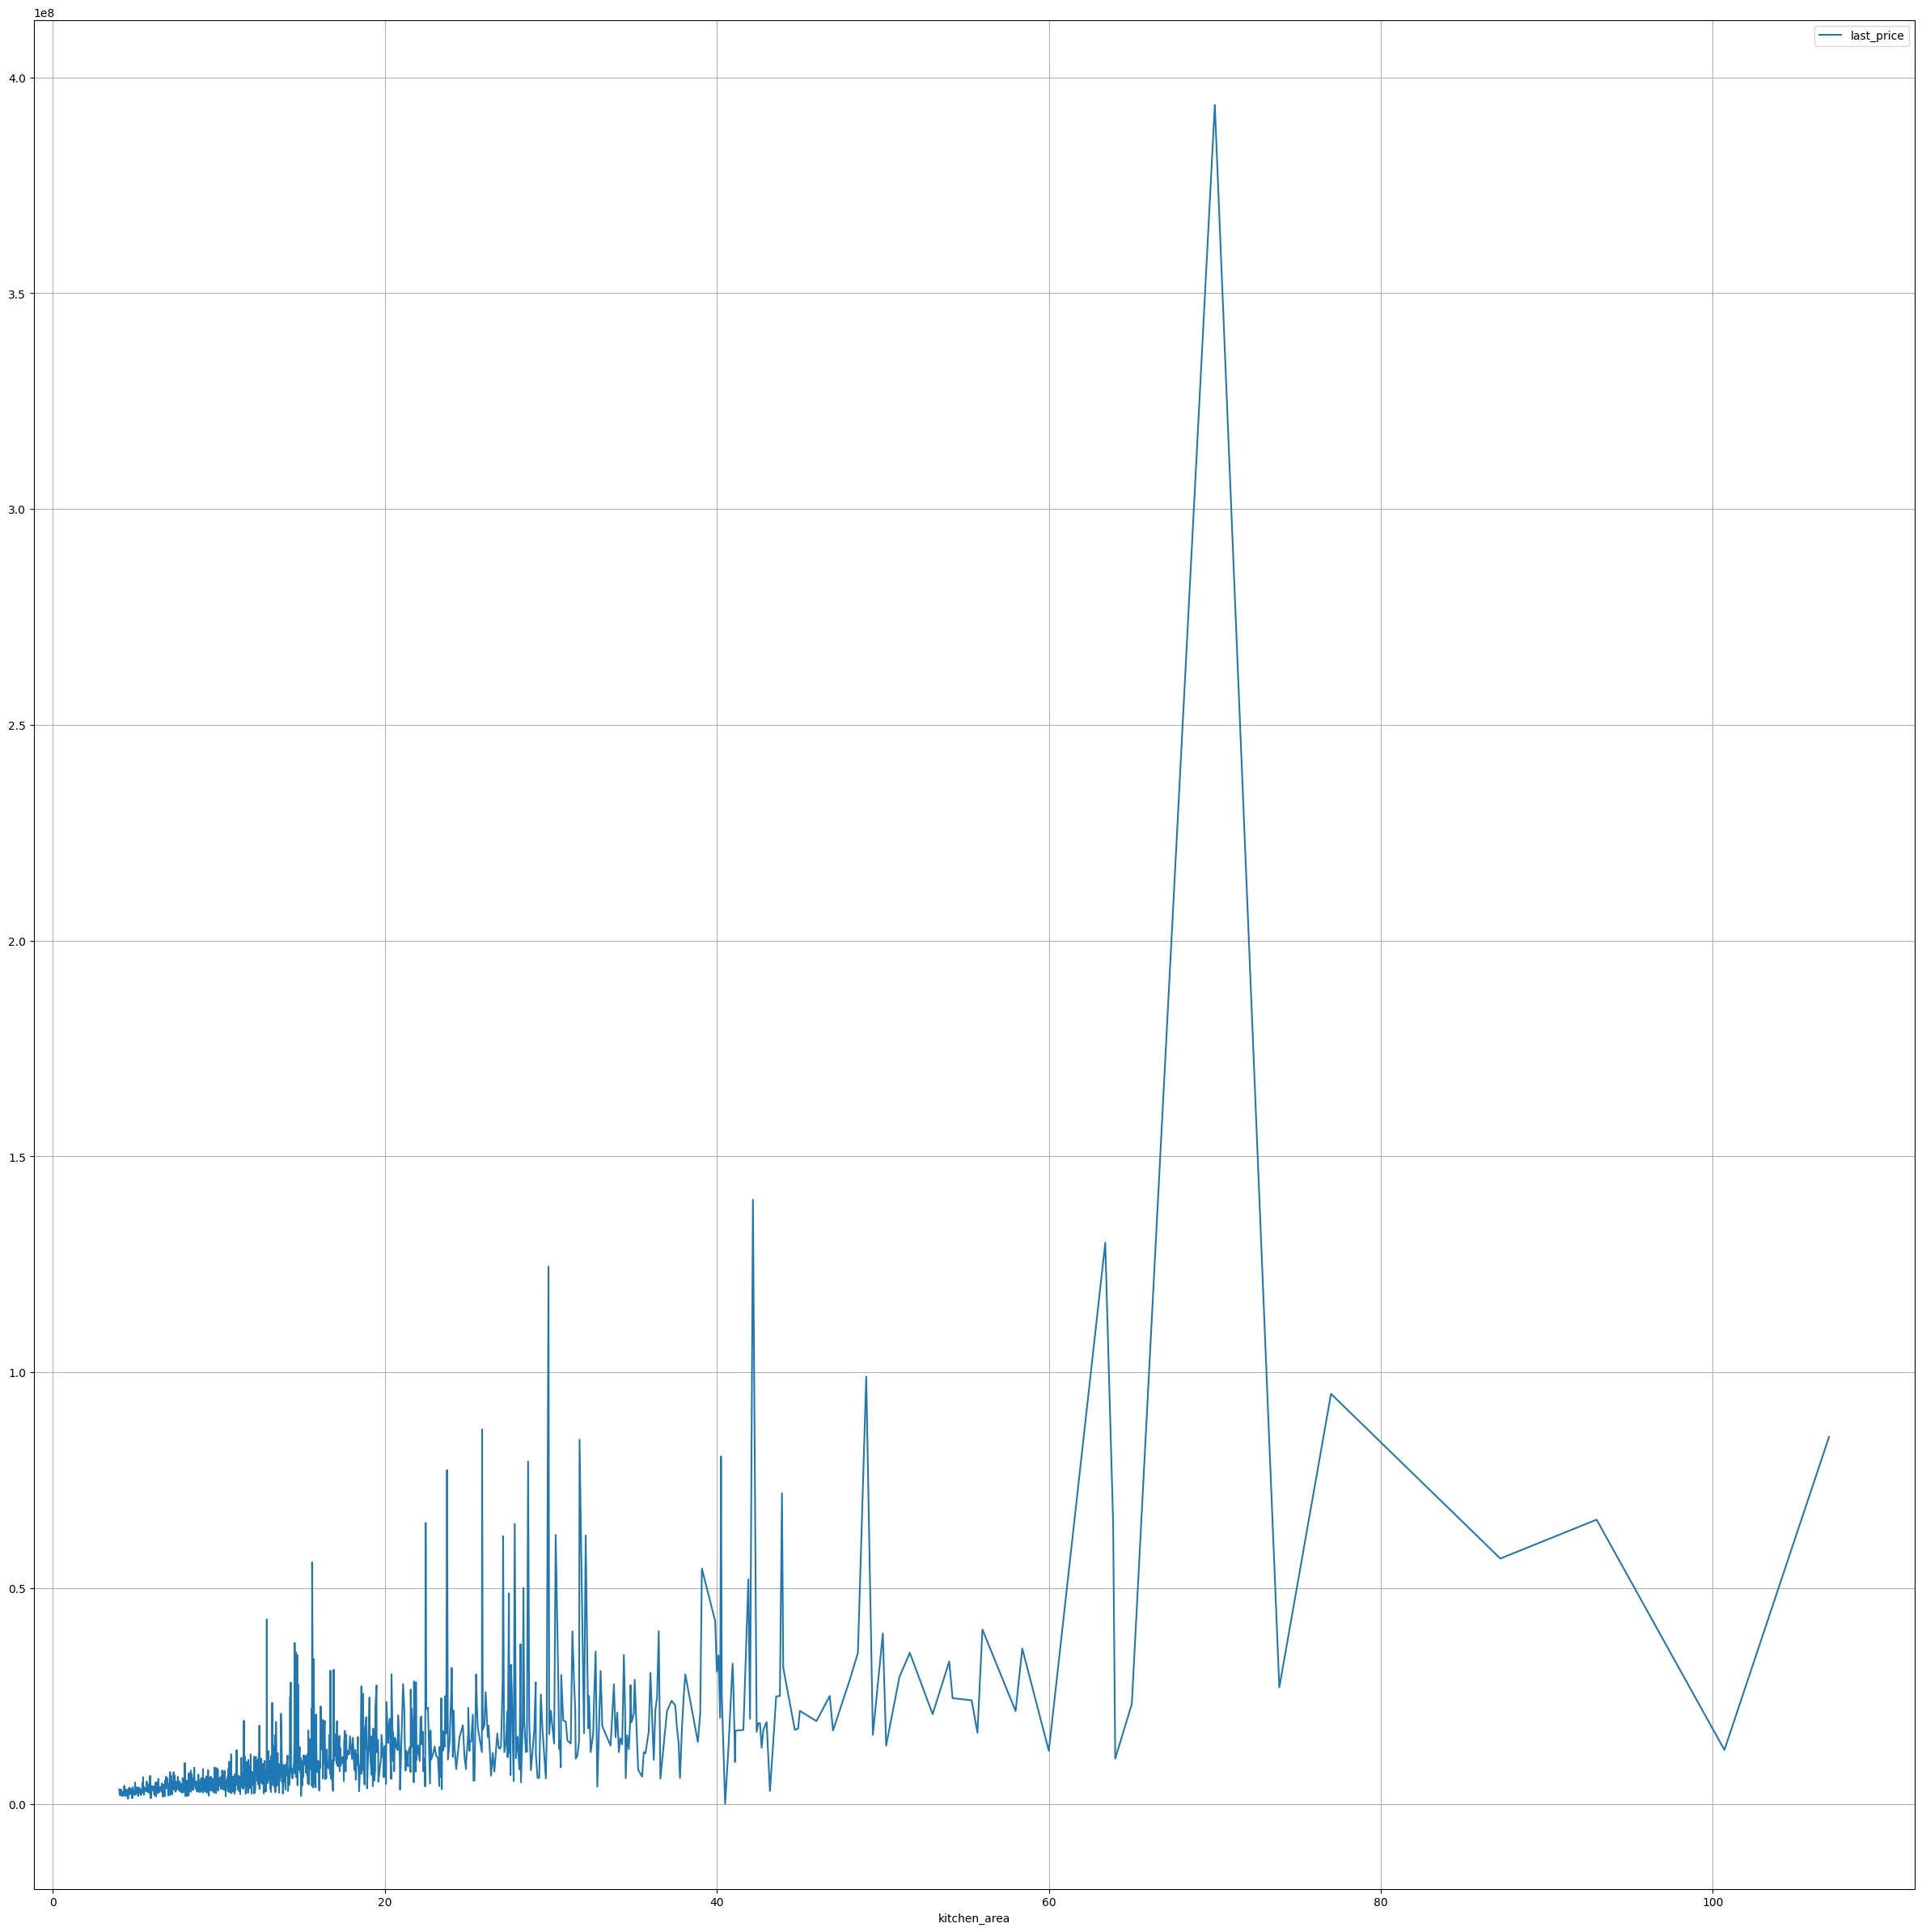

In [55]:
(data.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean')
 .plot(grid=True, figsize=(30,30))
)

По графкy видно, что с увеличением площади стоимость повышается.

###### Вывод:
Исходя из графиков зависимости между площадью(общей, жилой и кухни) и стоимотью, наблюдается повышение стоимости с увеличением площади. Однако, также видно, что бывает резкое снижение цены, поэтому необходимо изучуть другие зависимости. 

4.17 Установили зависимость между количеством комнат и ценой.

<AxesSubplot:xlabel='rooms'>

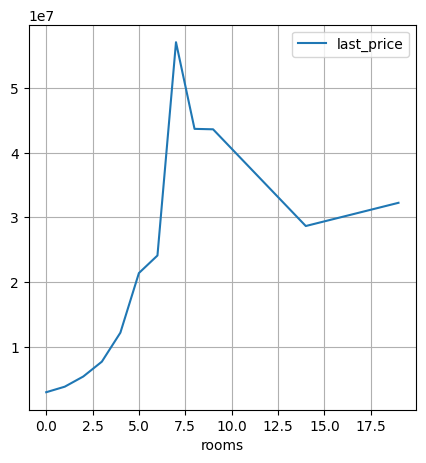

In [56]:
(data.pivot_table(index='rooms', values='last_price')
 .plot(grid=True, figsize=(5,5))
)

Заметно, повышение стоимоти с увелечением комнат, Квартиры с комнатами больше 10 меньше представлены, поэтому снижение цены не учитываем в общем анализе.

4.18 Установили зависимость между этажом, на котором расположена квартира, и ценой.

<AxesSubplot:xlabel='type_floor'>

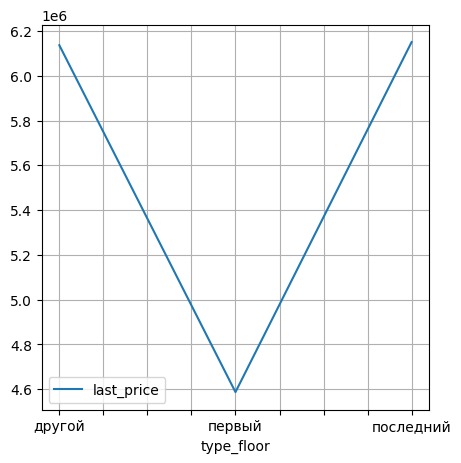

In [57]:
(data.pivot_table(index='type_floor', values='last_price')
 .plot(grid=True, figsize=(5,5))
)

Самые низкие  цена у квартир на первом этаже.

4.19 Установили зависимость днём размещения объявления и ценой.

<AxesSubplot:xlabel='weekday_exposition'>

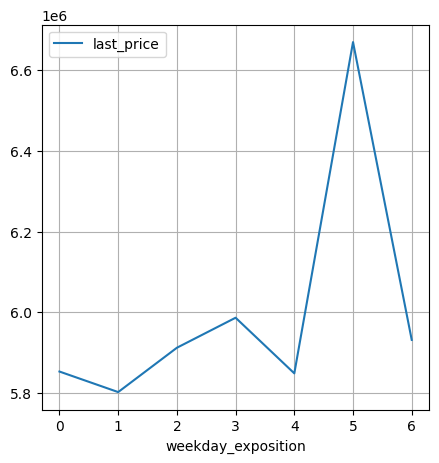

In [58]:
(data.pivot_table(index='weekday_exposition', values='last_price')
 .plot(grid=True, figsize=(5,5))
)

Самая высокая цена во субботу, а самая низкая во вторник. 

4.19 Установили зависимость месяцем размещения объявления и ценой.

<AxesSubplot:xlabel='month_exposition'>

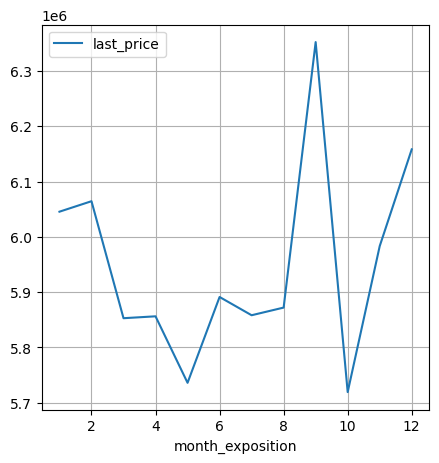

In [59]:
(data.pivot_table(index='month_exposition', values='last_price')
 .plot(grid=True, figsize=(5,5))
)

Высокая цена в сентрябре. Самая низкая цена в мае.

4.20 Установили зависимость годом размещения объявления и ценой.

<AxesSubplot:xlabel='year_exposition'>

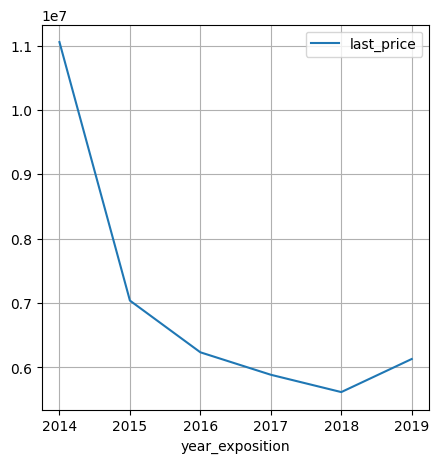

In [60]:
(data.pivot_table(index='year_exposition', values='last_price')
 .plot(grid=True, figsize=(5,5))
)

Лучший год по продажам 2014. Далее виднеется спад цен до 2018 года, после начинается рост.

##### Вывод:
<p>При построение графиков зависимоти цены от параметров наблюдается:</p>
<ul>
     <li>С увелечением площади(жилой, кухни, общей) стоимоть повышается.</li>
     <li>Чем больше комнат, тем выше цена.</li>
     <li>У квартир на первом этаже самая низкая стоимоть.</li>
     <li>Самая высокая цена во субботу, а самая низкая во вторник.</li>
     <li>Высокая цена в сентрябре. Самая низкая цена в мае.</li>
     <li>Лучший год по продажам 2014.</li>
</ul>

4.21. Вывели среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [61]:
dt_meanprice=pd.pivot_table(data, index='locality_name', values='price_one_m', aggfunc=['count','mean'])
dt_meanprice.columns=['count','mean']
dt_meanprice.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,13538,111987.214211
поселок Мурино,506,85181.290008
поселок Шушары,402,78630.498066
Всеволожск,361,68792.900831
Пушкин,329,102479.215536
Колпино,297,75700.105591
поселок Парголово,290,90488.738944
Гатчина,281,68386.715792
деревня Кудрово,267,92142.590976


4.22. Вывели топ-10 населённых пунктов с высокой стоимотью одного квадратного метра.

In [62]:
dt_high_price=pd.pivot_table(data, index='locality_name', values='price_one_m', aggfunc=['mean'])
dt_high_price.columns=['mean']
dt_high_price.sort_values('mean', ascending=False).head(10)

,mean
locality_name,
Санкт-Петербург,111987.214211
поселок Репино,108075.729241
Зеленогорск,106043.631314
Пушкин,102479.215536
Сестрорецк,101214.484084
Кудрово,100069.619450
поселок Левашово,96997.692240
деревня Мистолово,93098.852228
Мурино,92722.708374


4.22. Вывели топ-10 населённых пунктов с низкой стоимотью одного квадратного метра.

In [63]:
dt_low_price=pd.pivot_table(data, index='locality_name', values='price_one_m', aggfunc=['mean'])
dt_low_price.columns=['mean']
dt_low_price.sort_values('mean').head(10)

,mean
locality_name,
деревня Старополье,11309.331615
деревня Выскатка,11463.414634
поселок станции Свирь,11481.481481
деревня Ям-Тесово,12328.767123
поселок Совхозный,12555.555556
деревня Малая Романовка,12724.550317
поселок Тесово-4,12931.034483
деревня Сижно,13709.677419
поселок Житково,14956.275544


##### Вывод: 
Больше всего объявлений о продаже квартиры в Санкт-Петербурге-113538. Самая высокая за кв.м в Санкт-Петербурге-111 987 тыс. рублей, а самая низкая в пдеревне Старополье-11309 тыс. рублей. 


4.23. Провели анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра.

<AxesSubplot:xlabel='kmCentres_nearest'>

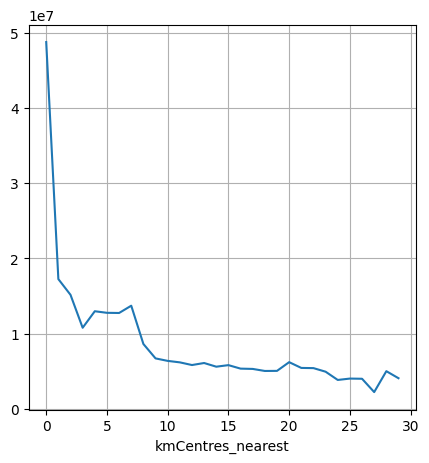

In [64]:
dt_km=data[['locality_name', 'last_price', 'kmCentres_nearest']]
dt_km=dt_km.loc[dt_km['locality_name']=="Санкт-Петербург"]
#dt_km_price['price_km']=(dt_km_price['last_price']/dt_km_price['kmCentres_nearest']).round()
#print(dt_km_price.groupby(by='kmCentres_nearest')['price_km'].mean().round())
#(dt_km_price.groupby(by='kmCentres_nearest')['price_km'].mean().round()
#    .plot(grid=True, figsize=(5,5))
#)
(dt_km.groupby(by='kmCentres_nearest')['last_price'].mean().round()
   .plot(grid=True, figsize=(5,5))
)


Чем ближе квартира находится к центру города, тем выше стоимость квартиры.

### Общий вывод
Завершив исследование о объявленях за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, можно выделить следющее:
    <ul>
        <li>Наблюдения по всем парметрам:
            <ol><li>Больше всего объявлений с площадью примерно 50 кв. м.</li>
                 <li>Жилая прощадь занимает от 15-30 кв.м</li>
                 <li>Кухня занимет 6-12 кв.м</li>
                 <li>Больше всего объявлений со стоимостью 3-6 млн. рублей</li>
                 <li>Больше всего квартир с 1-3 комнатами.</li>
                 <li>Высота потолков варьируется в пределах 2.46-3 метра</li>
                 <li>Меньше всего квартир на первом и последнем этажах.</li>
                 <li>Больше всего 4-5, 9-10 этажных домов.</li>
                 <li>Больше всего квартир на 1- 5 этаж</li>
                 <li>Меньше всего квартир на первом и последнем этажах.</li>
                 <li>Путь для ближайщего парка занимает до 900 м в среднем.</li>
                 <li>В среднем расстояние до центра не больше 20 км.</li>
                 <li>Расстояние до аэрпорта от 16 до 40 км в большинстве объявлений.</li>
                 <li>Чаще всего объявление публиковали в будние дни.</li>
                 <li>В феврале. марте, апреле и ноябре больше всего выставлено объявлений.</li>
            </ol>
        </li>
        <li>Зависимость стоимости от параметров:
            <ol>
                  <li>С увелечением площади(жилой, кухни, общей) стоимоть повышается.</li>
                  <li>Чем больше комнат, тем выше цена.</li>
                  <li>У квартир на первом этаже самая низкая стоимоть.</li>
                  <li>Самая высокая цена во субботу, а самая низкая во вторник.</li>
                  <li>Высокая цена в сентрябре. Самая низкая цена в мае.</li>
                  <li>Лучший год по продажам 2014.</li>
            </ol>
        </li>
        <li>Топ-10 населенных пунктов по количеству объявлений:
            <ol>
                <li>Санкт-Петербург-12216</li>	
                <li>поселок Мурино-506</li>		
                <li>поселок Шушары-402</li>	
                <li>Всеволожск-361</li>	
                <li>Пушкин-329</li>	
                <li>Колпино-297</li>	
                <li>поселок Парголово-290</li>	
                <li>Гатчина-281</li>
                <li>деревня Кудрово-267</li>	
                <li>Выборг-195</li>
            </ol>
        </li>
        <li>Самая высокая за кв.м в Санкт-Петербурге-111 987 тыс. рублей, а самая низкая в пдеревне Старополье-11309 тыс. рублей.
        </li>
        <li>Чем ближе квартира находится к центру города, тем выше стоимость одного кв.м. 
        </li>
    </ul>